In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
EXTRACT_DIR = "../ml-latest-small"

ratings = pd.read_csv(os.path.join(EXTRACT_DIR, "ratings.csv")) 
movies_with_tags_features = pd.read_csv("../movies_with_tags_features.csv") 
data = pd.merge(ratings, movies_with_tags_features, on="movieId")

X = data.drop(columns=["userId", "movieId", "title", "rating"])
y = data["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = load("../models_bin/random_forest.joblib")

In [6]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ RMSE: {rmse:.3f}")

✅ RMSE: 0.935


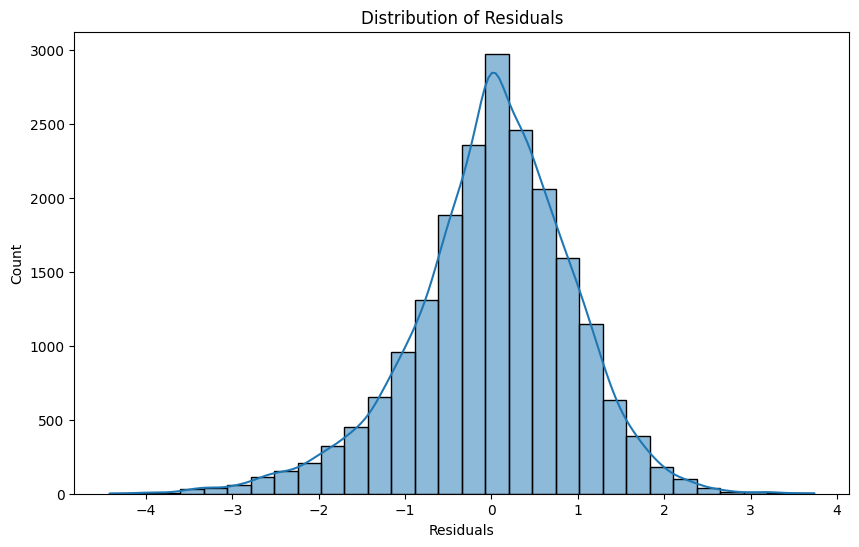

In [7]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

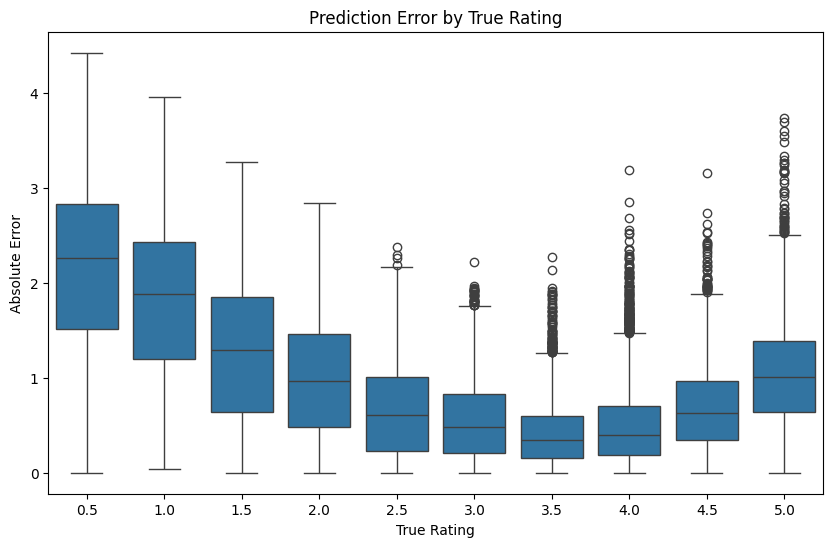

In [8]:
error_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
error_df["abs_error"] = abs(error_df["y_true"] - error_df["y_pred"])

plt.figure(figsize=(10, 6))
sns.boxplot(x="y_true", y="abs_error", data=error_df)
plt.xlabel("True Rating")
plt.ylabel("Absolute Error")
plt.title("Prediction Error by True Rating")
plt.show()

In [9]:
error_df

,y_true,y_pred,abs_error
67037,4.5,2.665000,1.835000
42175,3.0,2.873667,0.126333
93850,3.0,3.000000,0.000000
6187,4.0,3.810000,0.190000
12229,4.0,3.175000,0.825000
...,...,...,...
57416,2.0,2.785000,0.785000
67290,3.5,3.670000,0.170000
33423,4.5,3.975000,0.525000
98552,3.0,3.590000,0.590000
